# Project Title: Loan Approval Prediction

## **Introduction**
Loan approval refers to the formal authorization from a lender, like a bank, to grant you a loan. It signifies their agreement to provide you with a specific amount of money, under predefined terms, such as the interest rate and repayment period.
This process involves assessing various factors to determine whether the applicant meets the criteria for borrowing money.

## **Problem Statement**
Financial institutions rely heavily on efficient and accurate loan approval processes. Traditionally, these processes involve human expertise and judgment, which can be prone to bias and inconsistency. This is where the goal of this project comes in, Data science offers a promising alternative through the development of machine learning models capable of predicting loan defaults which will aid in the loan approval process.

**Dataset**
The [Loan Prediction Problem Dataset](https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset) provides information about loan applicants and their eligibility for loan approval:
1. Loan_ID: Unique identifier for each loan application.
2. Gender: Applicant's gender (Male/Female).
3. Married: Applicant's marital status (Yes/No).
4. Dependents: Number of dependents.
5. Education: Applicant's education level (Graduate/Not Graduate).
6. Self_Employed: Whether the applicant is self-employed or not (Yes/No).
7. ApplicantIncome: Applicant's income.
8. CoapplicantIncome: Co-applicant's income.
9. LoanAmount: Loan amount in thousands.
10. Loan_Amount_Term: Term of the loan in months.
11. Credit_History: Credit history meets guidelines (1: Yes, 0: No).
12. Property_Area: Applicant's property area (Urban/Semiurban/Rural).
13. Loan_Status: Target variable indicating loan approval (Y: Yes, N: No).

## **Objective**
Given the loan prediction dataset containing information about loan applicants, such as their demographic details, financial history, and loan characteristics, The goal of this project is to develop a machine learning model that accurately predicts whether or not an applicant's loan application will be approved or not based these various features.
By automating this process, the institution can streamline operations, reduce processing time, and make more consistent decisions.

## **Project Workflow:**
***Data Exploration***
- Library Importation : Importing relevant Libraries for the project
- Data Loading: Loading the dataset(s) into your preferred data analysis environment.
- Data Overview: Explore the dataset to understand its structure, features, and target variable. Check for missing values, data types, and statistical summaries.

***Data Preprocessing***
- Data Cleaning: Cleaning the dataset to handle missing values, and inconsistencies.
- Data Imbalance: Handling data imbalances if any.
- Encoding Categorical Variable: Convert categorical variables (such as gender, marital status, and education) into numerical representations, using techniques like one-hot encoding or label encoding.
- Feature Engineering: Normalize or scale numerical or create new features if necessary improve model performance.

***Exploratory Data Analysis (EDA) / Data Visualization***
- Univariate Analysis: Visualize the distribution of individual features.
- Bivariate Analysis: Explore relationships between features and the target variable (loan approval).
  
***Model Building***
- Data Splitting: Split the dataset into training and testing subsets.  
- Model Selection: Choose desired machine learning algorithms and tune prefered hyperparameters using cross-validation.
- Model Training: Train the selected model on the training data.
- Model Evaluation: Evaluate the model's performance using metrics such as accuracy, precision, recall, F1-score, confusion matrices and ROC curves.

***Conclusion***  
Summarize the findings from the analysis, including insights about important features, model performance, and recommendations for loan approval.

***Project Limitation***  
The use of machine learning models in loan approval requires careful attention to fairness and transparency to avoid perpetuating discrimination or bias and this addresses a complex problem with ethical considerations.

***Future Work***  
Deployment and monitoring - Integrating the model into a production environment and continuously monitoring its performance to ensure its effectiveness and fairness.



### Data Exploration

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, explained_variance_score

In [ ]:
# Load the train dataset
train_df = pd.read_csv("/content/train_loan_dataset.csv")
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test_df = pd.read_csv("/content/test_loan dataset.csv")
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
# Checking the shape of the datasets
print(train_df.shape, test_df.shape)

(614, 13) (367, 12)


In [ ]:
# Displaying the Datasets info
print("Train DataFrame Information:")
print(train_df.info())
print("\n" + "_"*50 + "\n")
print("Test DataFrame Information:")
print(test_df.info())


Train DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

__________________________________________________

Test DataFrame Informatio

In [ ]:
# Checking the dtypes of the DataFrames
print("Train dtypes:")
print(train_df.dtypes)
print("\n" + "_"*50 + "\n")
print("Test dtypes:")
print(test_df.dtypes)


Train dtypes:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

__________________________________________________

Test dtypes:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object


In [ ]:
# Checking the summary statistics of the numerical columns
print("Train Summary Statistics:")
print(train_df.describe())
print("\n" + "_"*50 + "\n")
print("Test Summary Statistics :")
print(test_df.describe())


Train Summary Statistics:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  

__________________________________________________

Test Summary Statistics :
   

### Data Preprocessing

In [ ]:
# Checking for duplicate values
print(train_df.duplicated().any(), test_df.duplicated().any())

False False


In [ ]:
# Checking for missing values
print("Train missing values:")
print(train_df.isnull().sum().sort_values(ascending=False))
print("\n" + "_"*50 + "\n")
print("Test missing values :")
print(test_df.isnull().sum().sort_values(ascending=False))


Train missing values:
Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

__________________________________________________

Test missing values :
Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Loan_ID               0
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64


In [ ]:
# Handling train_df missing values

# List of columns with missing values that will be filled with the mode
null_cols = ['Credit_History', 'Self_Employed', 'Dependents', 'Loan_Amount_Term', 'Gender', 'Married']

# Loop through each column in the list
for col in null_cols:
    # Calculate the mode of the column
    mode_fill = train_df[col].mode()[0]
    # Fill missing values in the column with the mode
    train_df[col].fillna(mode_fill, inplace=True)
    # Print a message indicating the column and the value used for filling
    print(f"Filled {col} with mode: {mode_fill}")

# Calculate the median of the 'LoanAmount' column
median_fill = train_df['LoanAmount'].median()

# Fill missing values in the 'LoanAmount' column with the median
train_df['LoanAmount'].fillna(median_fill, inplace=True)
# Print a message indicating the column and the value used for filling
print(f"Filled 'LoanAmount' with median: {median_fill}")

Filled Credit_History with mode: 1.0
Filled Self_Employed with mode: No
Filled Dependents with mode: 0
Filled Loan_Amount_Term with mode: 360.0
Filled Gender with mode: Male
Filled Married with mode: Yes
Filled 'LoanAmount' with median: 128.0


In [ ]:
# Handling test_df missing values

# List of columns with missing values that will be filled with the mode
null_cols2 = ['Credit_History', 'Self_Employed', 'Dependents', 'Loan_Amount_Term', 'Gender']

# Loop through each column in the list
for col in null_cols2:
    # Calculate the mode of the column
    mode_fill = test_df[col].mode()[0]
    # Fill missing values in the column with the mode
    test_df[col].fillna(mode_fill, inplace=True)
    # Print a message indicating the column and the value used for filling
    print(f"Filled {col} with mode: {mode_fill}")

# Calculate the median of the 'LoanAmount' column
median_fill = test_df['LoanAmount'].median()

# Fill missing values in the 'LoanAmount' column with the median
test_df['LoanAmount'].fillna(median_fill, inplace=True)
# Print a message indicating the column and the value used for filling
print(f"Filled 'LoanAmount' with median: {median_fill}")

Filled Credit_History with mode: 1.0
Filled Self_Employed with mode: No
Filled Dependents with mode: 0
Filled Loan_Amount_Term with mode: 360.0
Filled Gender with mode: Male
Filled 'LoanAmount' with median: 125.0


In [ ]:
# Checking for missing values again
print("Train missing values:")
print(train_df.isnull().sum().sort_values(ascending=False))
print("\n" + "_"*50 + "\n")
print("Test missing values :")
print(test_df.isnull().sum().sort_values(ascending=False))


Train missing values:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

__________________________________________________

Test missing values :
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


The missing values problem has been sorted  
However we will have to proceed to EDA and continue with our **data preprocessing after that**

### Exploratory Data Analysis (EDA) / Data Visualization

**Univariate Visualization of the categorical features**

In [ ]:
def univariate_visual(df, col):
  """
  This function visualizes the distribution of the loan status variable
  using a countplot and a pie chart.

  Args:
      df (pandas.DataFrame): The DataFrame containing the loan status data.
      col (pandas.series): The column that its visual will e displayed.
  """

  # Create the figure with two subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

  # Plot the countplot on the first subplot (ax1)
  sns.countplot(x=col, data=df, palette="rocket", ax=ax1)
  ax1.set_title(f'{col} Distribution')

  # Calculate loan status counts
  counts = df[col].value_counts()

  # Plot the pie chart on the second subplot (ax2)
  color =  ['purple', 'plum', 'coral', 'pink']#['purple', 'coral']
  ax2.pie(counts.values, labels=counts.index, colors=color, autopct='%1.1f%%')
  ax2.set_title(f'{col} percentage')

  # Add a white circle in the pie chart (optional)
  my_circle = plt.Circle((0, 0), 0.4, color='white')
  ax2.add_artist(my_circle)

  # Adjust layout (optional)
  plt.tight_layout()

  plt.show()

<ipython-input-13-40288e2821f8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="rocket", ax=ax1)


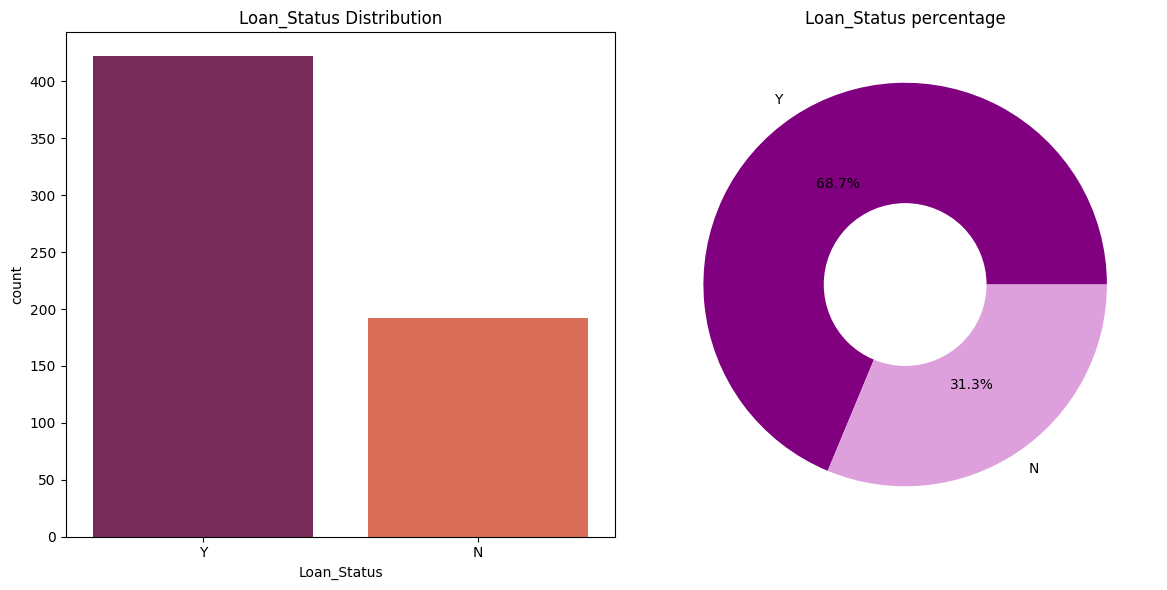

In [ ]:
# Visualizing the target variable - Loan_Status
univariate_visual(train_df, 'Loan_Status')

<ipython-input-13-40288e2821f8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="rocket", ax=ax1)


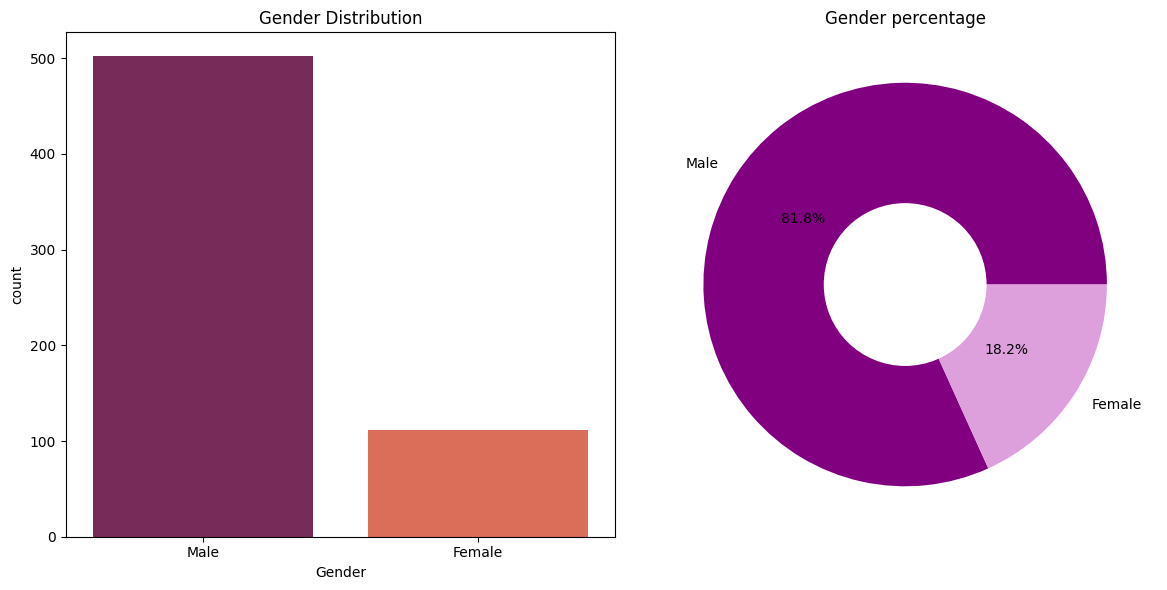

In [ ]:
# Visualizing the features variable - Gender
univariate_visual(train_df, 'Gender')

<ipython-input-13-40288e2821f8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="rocket", ax=ax1)


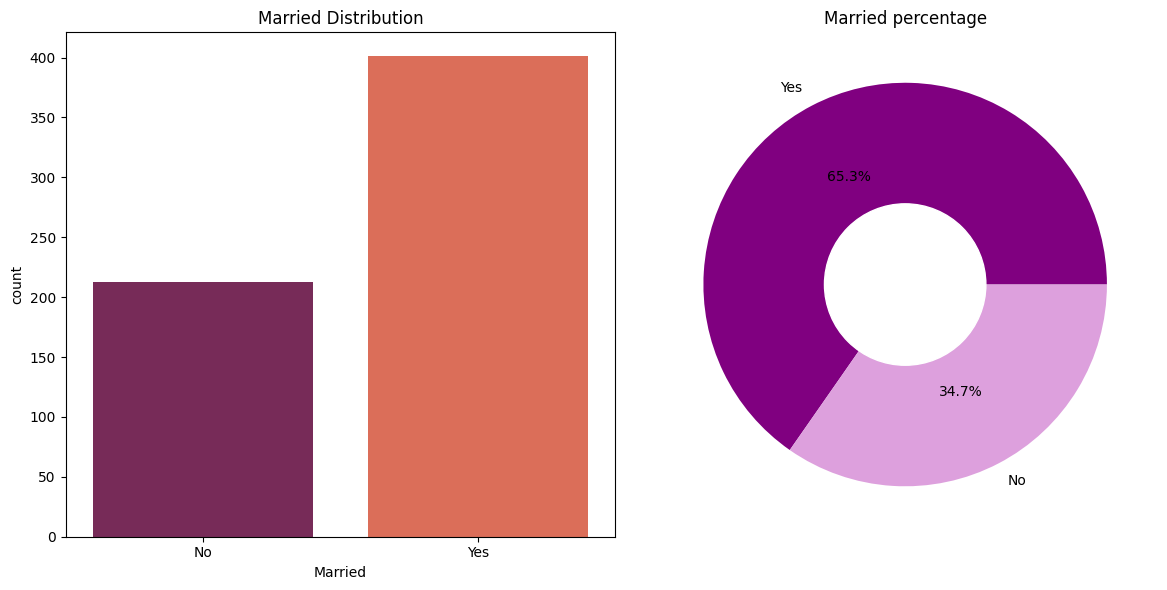

In [ ]:
# Visualizing the features variable - Married
univariate_visual(train_df, 'Married')

<ipython-input-13-40288e2821f8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="rocket", ax=ax1)


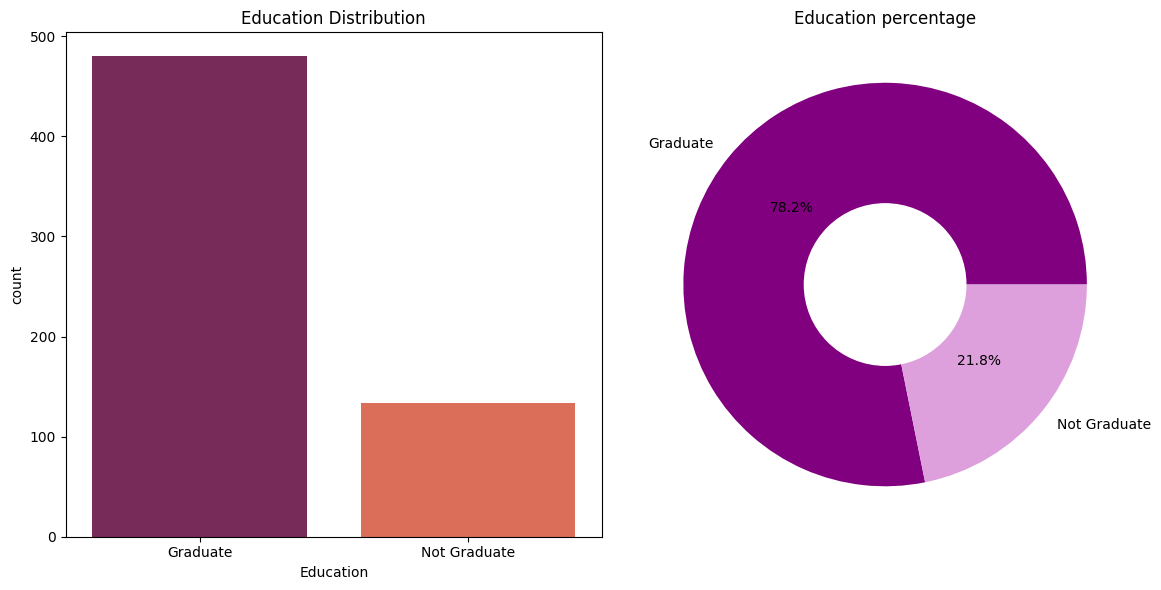

In [ ]:
# Visualizing the features variable - Education
univariate_visual(train_df, 'Education')

<ipython-input-13-40288e2821f8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="rocket", ax=ax1)


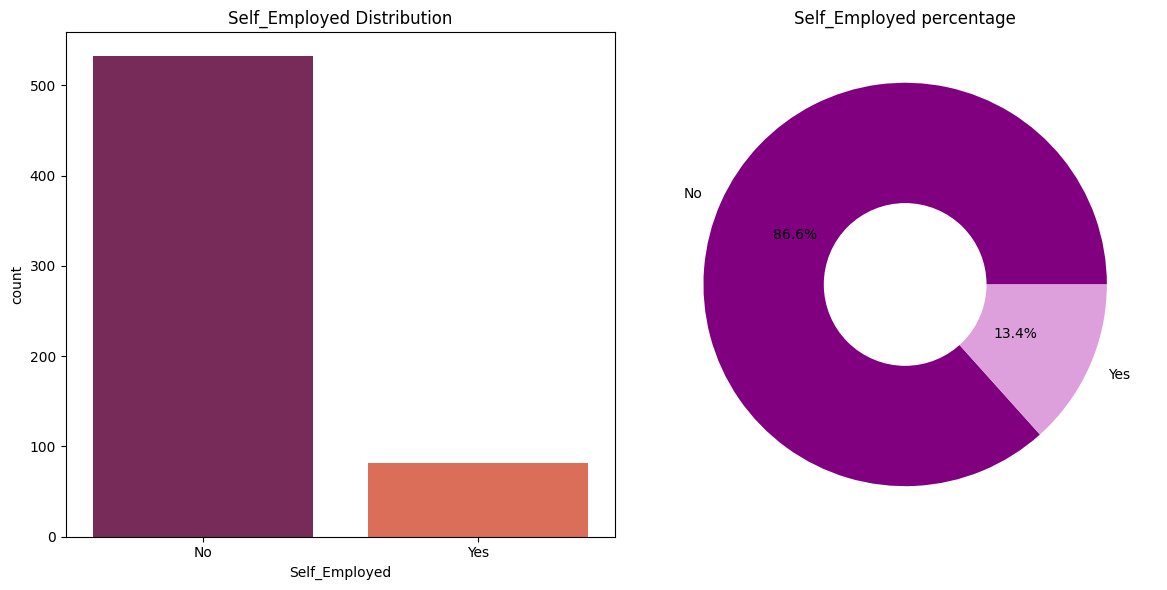

In [ ]:
# Visualizing the features variable - Self_Employed
univariate_visual(train_df, 'Self_Employed')

<ipython-input-13-40288e2821f8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="rocket", ax=ax1)


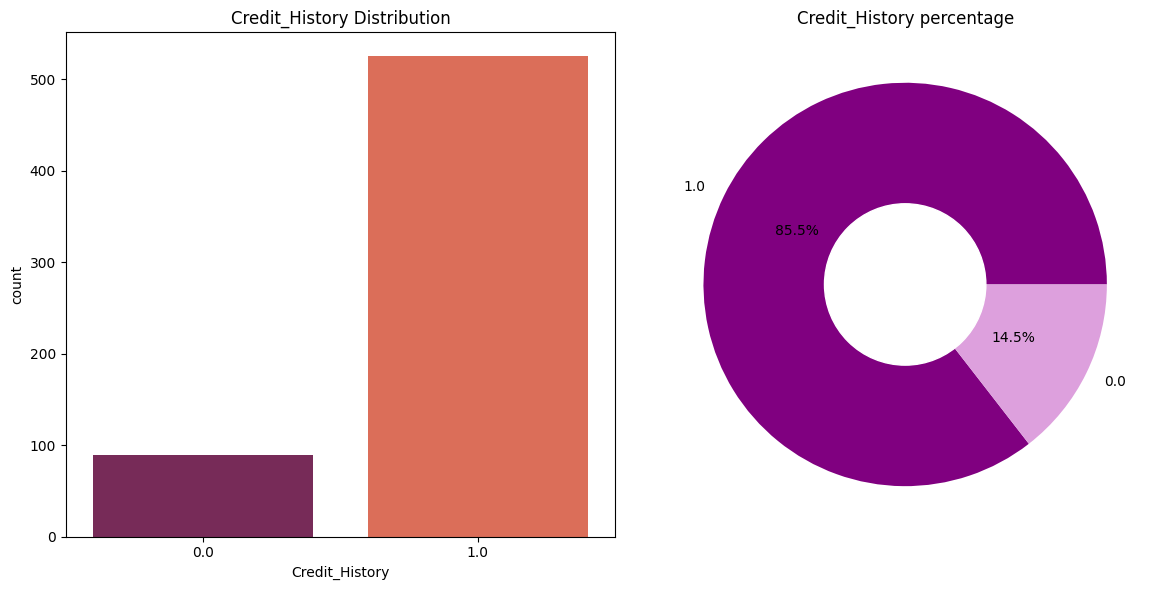

In [ ]:
# Visualizing the features variable - Credit_History
univariate_visual(train_df, 'Credit_History')

<ipython-input-13-40288e2821f8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="rocket", ax=ax1)


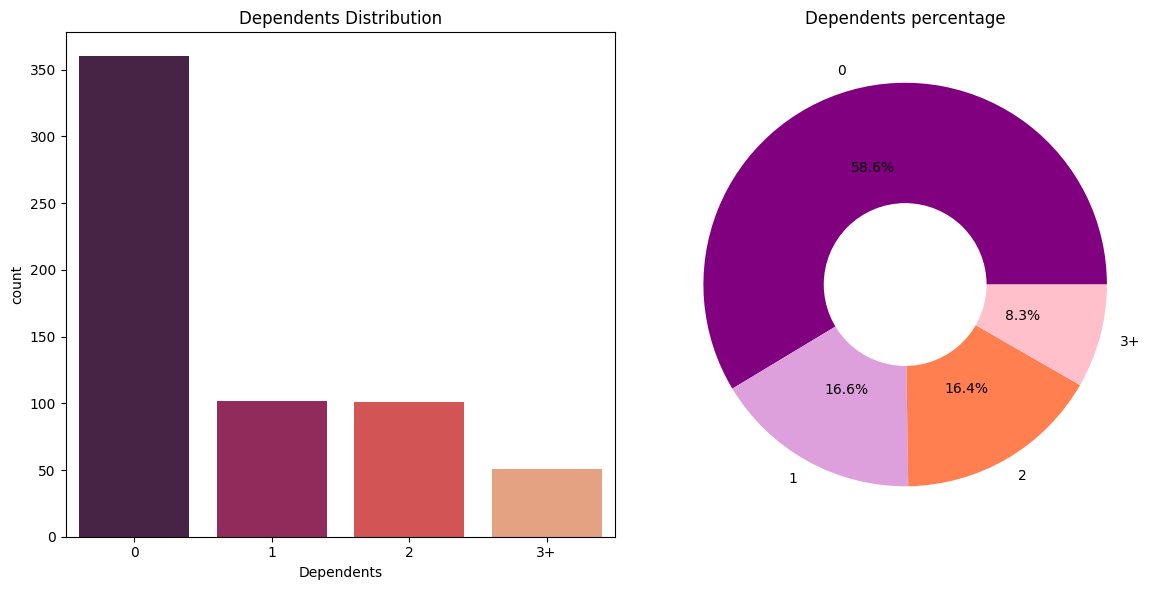

In [ ]:
# Visualizing the features variable - Dependents
univariate_visual(train_df, 'Dependents')

<ipython-input-13-40288e2821f8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="rocket", ax=ax1)


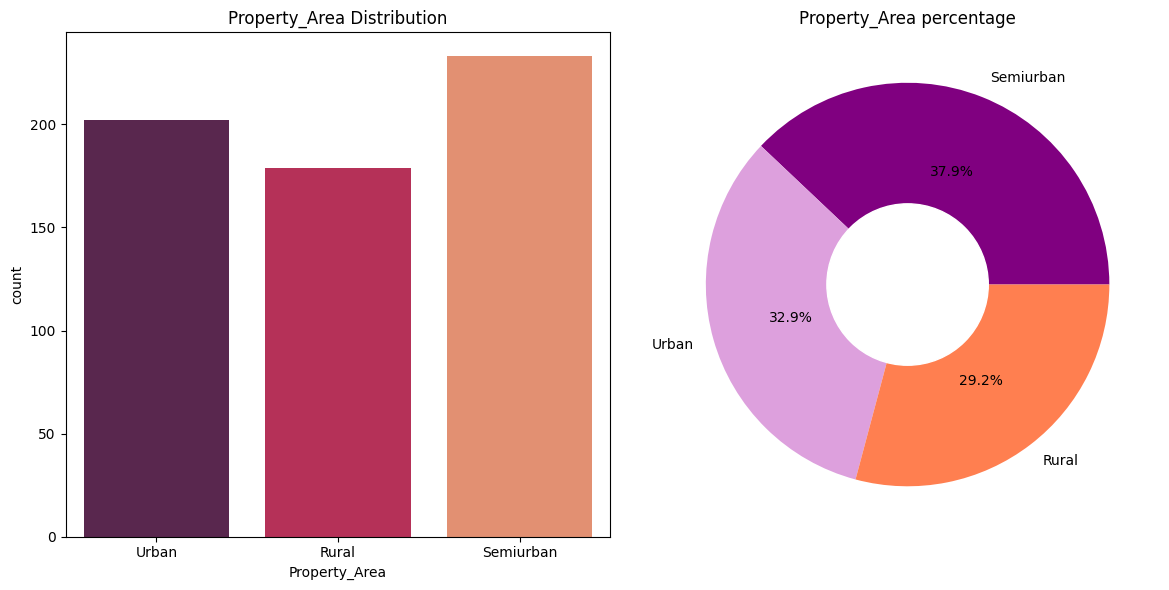

In [ ]:
# Visualizing the features variable - Property_Area
univariate_visual(train_df, 'Property_Area')

**Univariate Visualization of the numerical features**

In [ ]:
def numerical_visual(df, col):
  """
  This function visualizes the distribution and spread of a numerical feature using a histogram
  and a boxplot displayed side-by-side, with the 'rocket' color palette.

  Args:
      df (pandas.DataFrame): The DataFrame containing the feature data.
      col (str): The name of the numerical feature to visualize.
  """

  # Create the figure with two subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

  # Plot the histogram with KDE on the first subplot (ax1)
  sns.histplot(df[col], bins=20, kde=True, ax=ax1)
  ax1.set_title(f'{col} Distribution')

  # Plot the boxplot on the second subplot (ax2)
  sns.boxplot(df[col], ax=ax2)
  ax2.set_title(f'{col} Spread')

  # Adjust layout (optional)
  plt.tight_layout()

  plt.show()


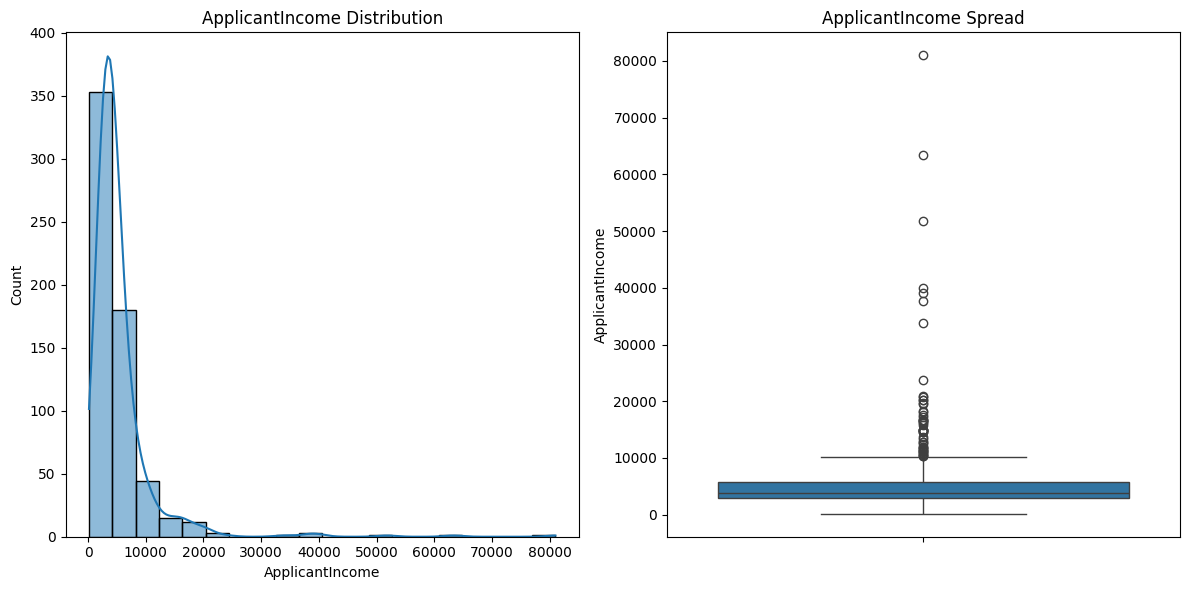

In [ ]:
# Visualizing the features variales - ApplicantIncome
numerical_visual(train_df, 'ApplicantIncome')

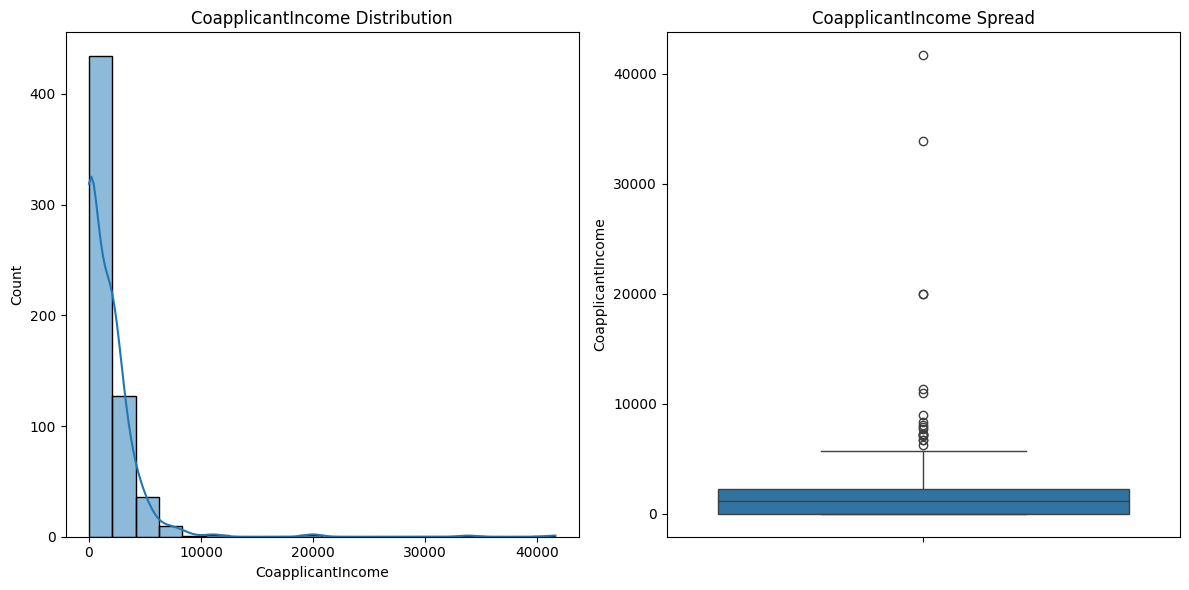

In [ ]:
# Visualizing the features variales - CoapplicantIncome
numerical_visual(train_df, 'CoapplicantIncome')

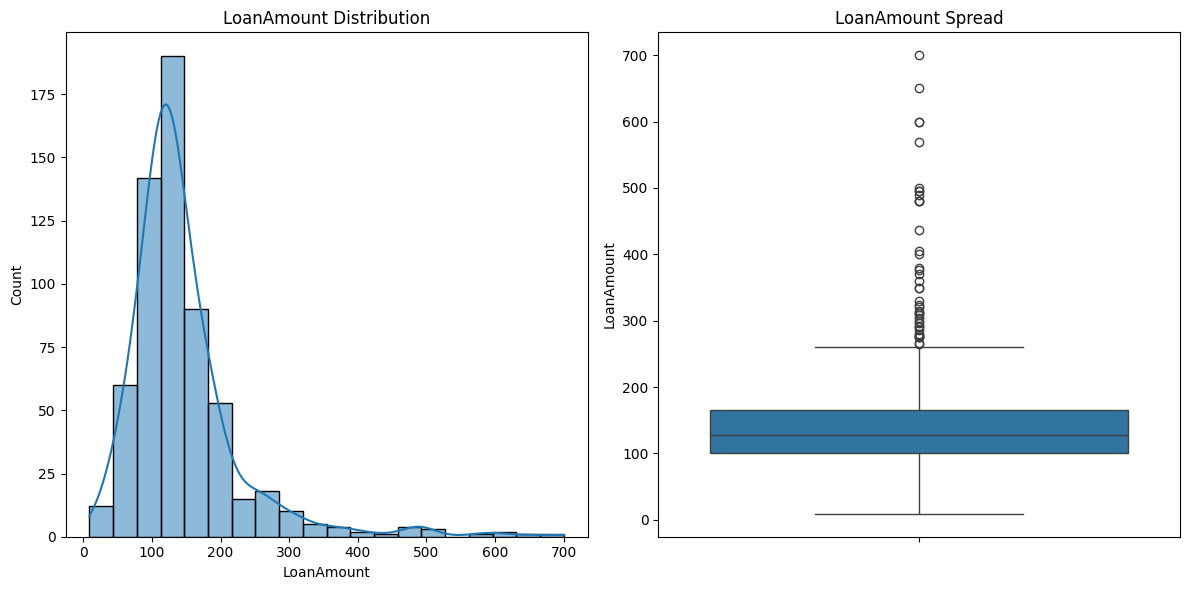

In [ ]:
# Visualizing the features variales - LoanAmount
numerical_visual(train_df, 'LoanAmount')

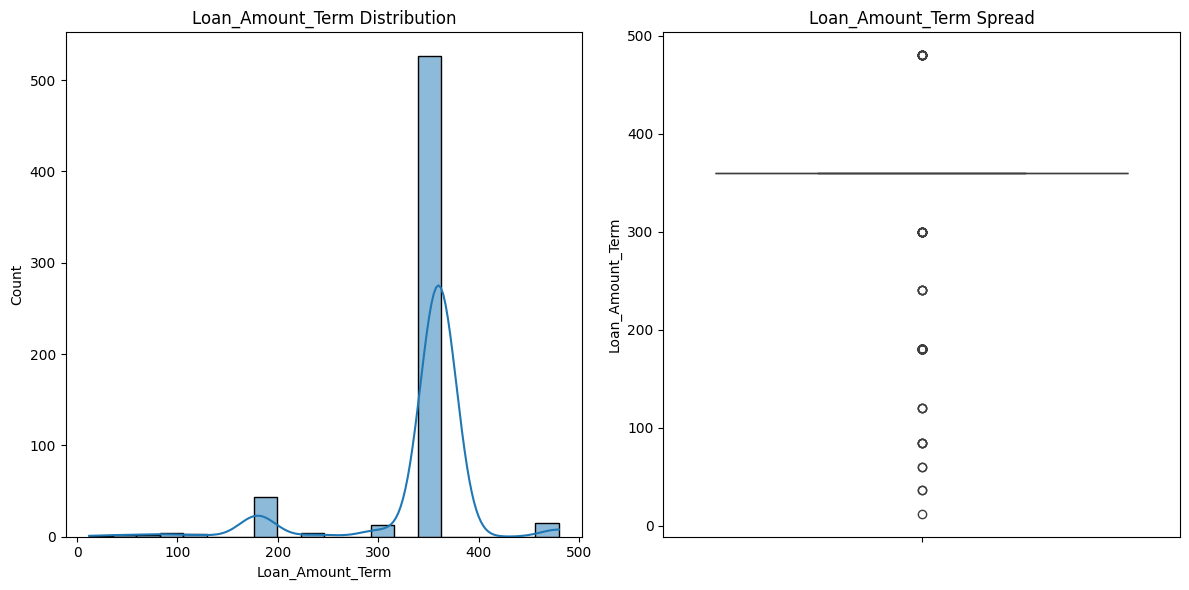

In [ ]:
# Visualizing the features variales - Loan_Amount_Term
numerical_visual(train_df, 'Loan_Amount_Term')

**Biavariate Visualization**

In [ ]:
def categorical_relationship(df, col, col2='Loan_Status'):
  """
  This function visualizes the relationship between a categorical feature and the target variable.

  Args:
      df_train (pandas.DataFrame): The DataFrame containing the data.
      col (str): The name of the categorical feature.
      col2 (str): The target variable column.
  """

  # Countplot - Loan Status by Feature
  plt.figure(figsize=(8, 6))
  sns.countplot(data=df, hue=col, x=col2, palette='rocket')
  plt.xlabel(f'{col2}')
  plt.title(f'Loan Status by {col}')
  plt.show()

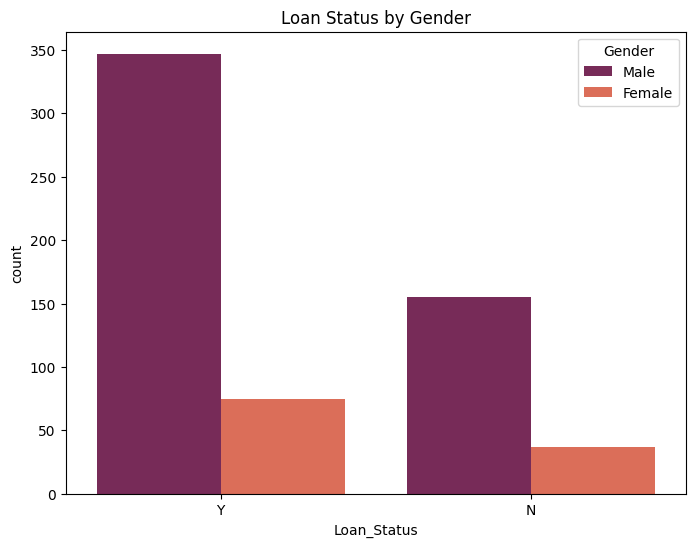

In [ ]:
# Visualizing the categorical features - Gender by Loan_Status
categorical_relationship(train_df, 'Gender')

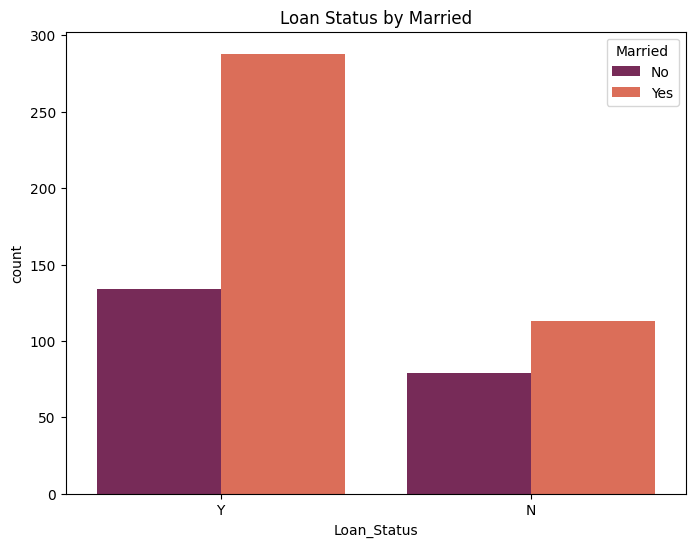

In [ ]:
# Visualizing the categorical features - Married by Loan_Status
categorical_relationship(train_df, 'Married')

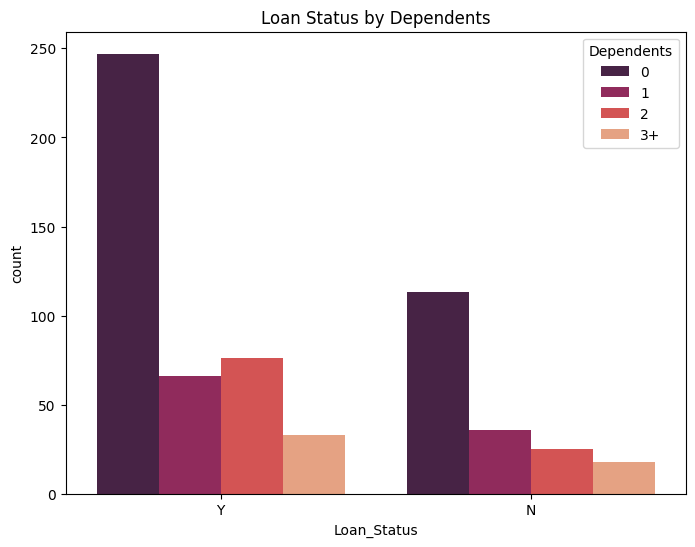

In [ ]:
# Visualizing the categorical features - Dependents by Loan_Status
categorical_relationship(train_df, 'Dependents')

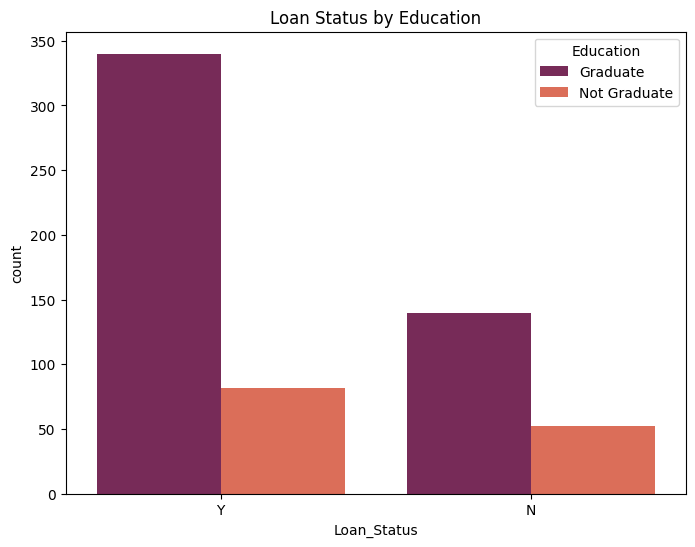

In [ ]:
# Visualizing the categorical features - Education by Loan_Status
categorical_relationship(train_df, 'Education')

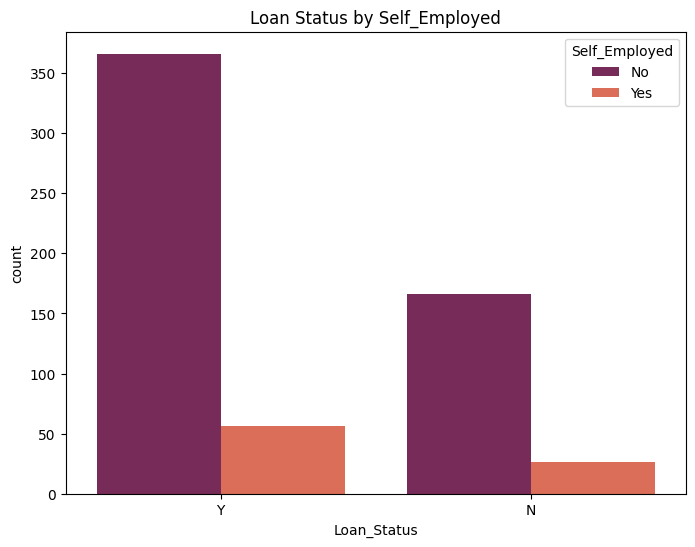

In [ ]:
# Visualizing the categorical features - Self_Employed by Loan_Status
categorical_relationship(train_df, 'Self_Employed')

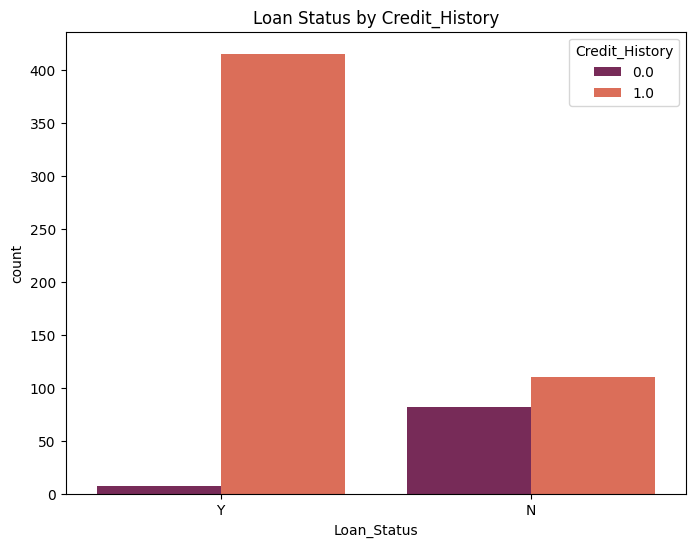

In [ ]:
# Visualizing the categorical features - Credit_History by Loan_Status
categorical_relationship(train_df, 'Credit_History')

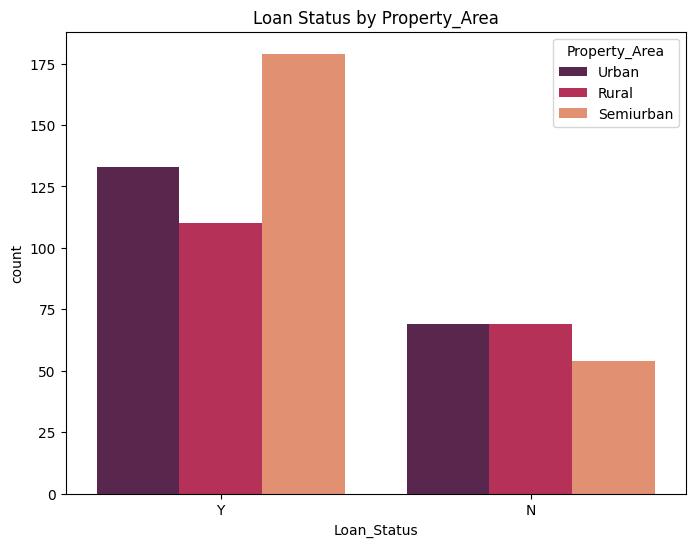

In [ ]:
# Visualizing the categorical features - Property_Area by Loan_Status
categorical_relationship(train_df, 'Property_Area')

In [ ]:
def numerical_relationship(df, col, col2='Loan_Status'):
  """
  This function visualizes the relationship between a categorical feature and the target variable.

  Args:
      df_train (pandas.DataFrame): The DataFrame containing the data.
      col (str): The name of the categorical feature.
      col2 (str): The target variable column.
  """

  # Countplot - Loan Status by Feature
  plt.figure(figsize=(8, 6))
  sns.boxplot(data=df, x=col2, y=col, palette='rocket')
  plt.xlabel(f'{col2}')
  plt.title(f'Loan Status by {col}')
  plt.show()

<ipython-input-35-45286a81136e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col2, y=col, palette='rocket')


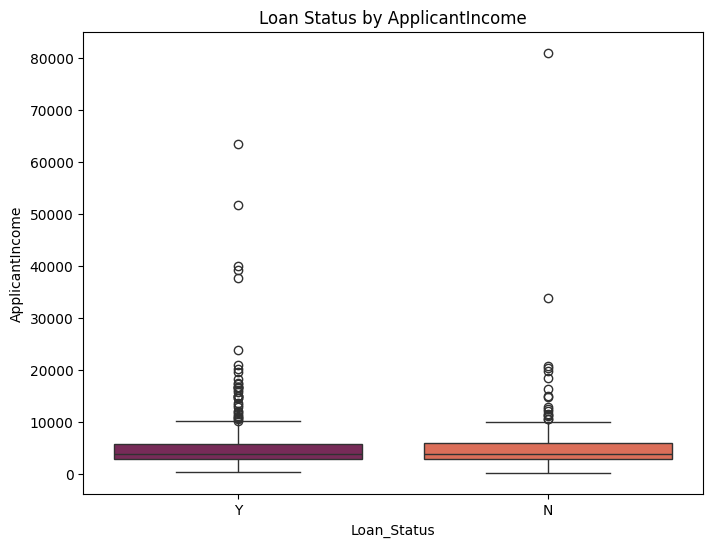

In [ ]:
# Visualizing the numerical features - ApplicantIncome by Loan_Status
numerical_relationship(train_df, 'ApplicantIncome')

<ipython-input-35-45286a81136e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col2, y=col, palette='rocket')


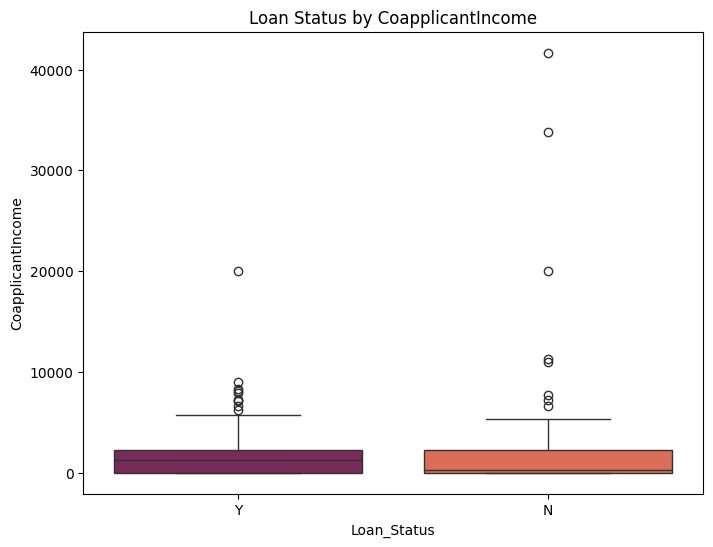

In [ ]:
# Visualizing the numerical features - CoapplicantIncome by Loan_Status
numerical_relationship(train_df, 'CoapplicantIncome')

<ipython-input-35-45286a81136e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col2, y=col, palette='rocket')


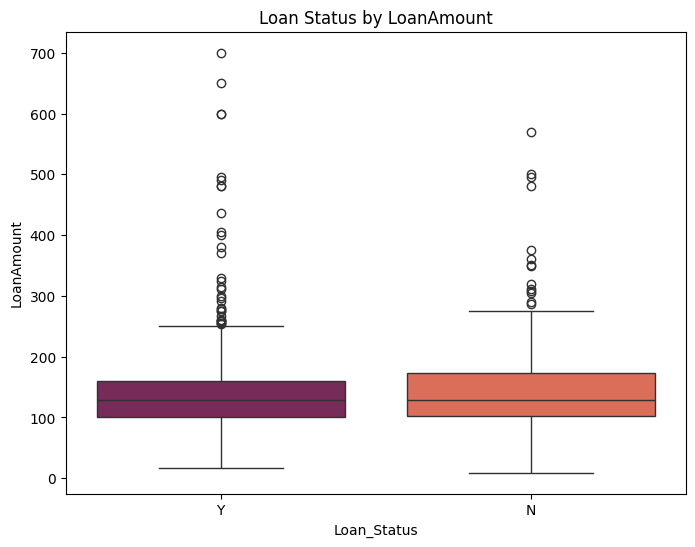

In [ ]:
# Visualizing the numerical features - LoanAmount by Loan_Status
numerical_relationship(train_df, 'LoanAmount')

<ipython-input-35-45286a81136e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col2, y=col, palette='rocket')


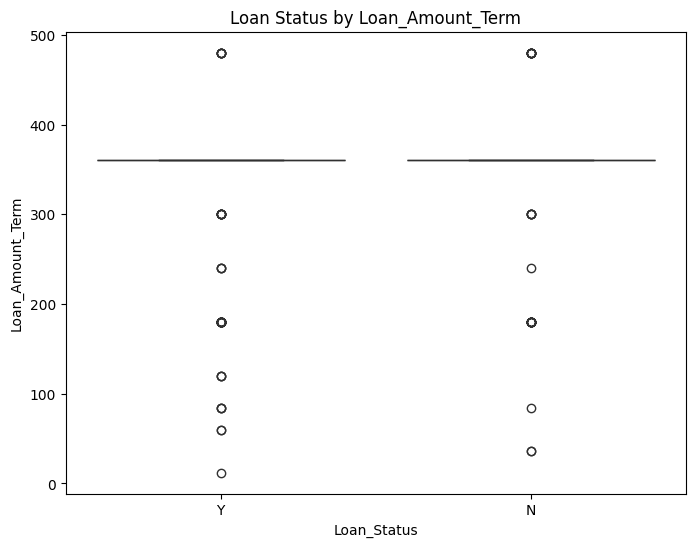

In [ ]:
# Visualizing the numerical features - Loan_Amount_Term by Loan_Status
numerical_relationship(train_df, 'Loan_Amount_Term')

In [ ]:
# Creating a correlation between the training dataset
corr_matrix = train_df.corr()
corr_matrix

<ipython-input-40-c474cb8dc74d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


<ipython-input-41-967b46fc95ac>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, cmap='rocket', fmt='.2f', linewidths=.5)


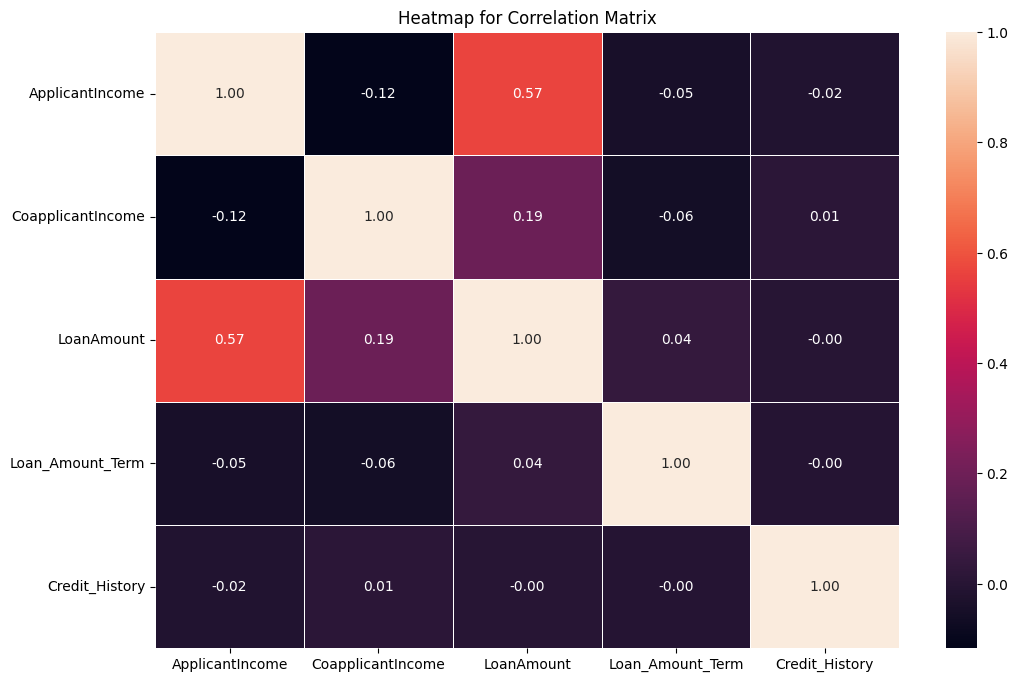

In [ ]:
# Plotting Heatmap for better visualization
plt.figure(figsize=(12,8))
sns.heatmap(train_df.corr(), annot=True, cmap='rocket', fmt='.2f', linewidths=.5)
plt.title("Heatmap for Correlation Matrix")
plt.show()

***Data Preprocessing Contd***

The percentage of Y class : 0.69
The percentage of N class : 0.31


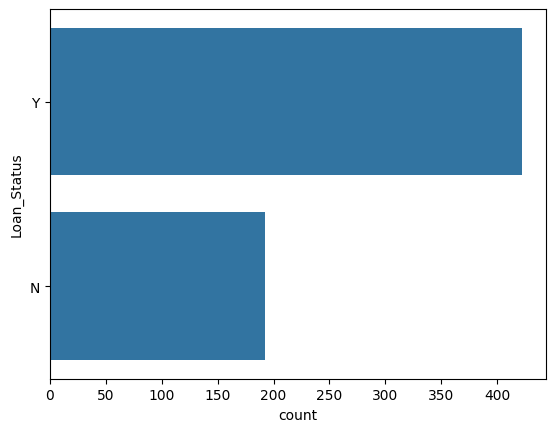

In [ ]:
# Checking for data imbalance
sns.countplot(train_df['Loan_Status'])
print('The percentage of Y class : %.2f' % (train_df['Loan_Status'].value_counts()[0] / len(train_df)))
print('The percentage of N class : %.2f' % (train_df['Loan_Status'].value_counts()[1] / len(train_df)))


The data isn't exactly imbalanced, here is why;  
**Threshold for Imbalance:**
There isn’t a strict threshold, but a class distribution below 10% is often considered significantly imbalanced.   
  * Hence a proportion of 69% : 31% isn't so bad, we'll just have to focus more attention on the precision and recall of the model rather than the accuracy

In [ ]:
# Droping the Loan_ID column
train_df.drop('Loan_ID', axis=1,  inplace=True)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [154]:
test_df.drop('Loan_ID', axis=1,  inplace=True)

In [ ]:
# Selecting the numerical columns
num_cols = list(train_df.select_dtypes('number'))
train_df[num_cols].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [ ]:
# Selcting the categorical/object dtype columns
cat_cols = list(train_df.select_dtypes('object'))
train_df[cat_cols].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [ ]:
# Label encode object
encoder = LabelEncoder()

# Apply LabelEncoder to each of the categorical columns
for col in cat_cols:
    train_df[col] = encoder.fit_transform(train_df[col])

# Print the head of the dataframe
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [ ]:
cat_cols.remove('Loan_Status')
cat_cols

In [152]:

# Label encode object
encoder = LabelEncoder()

# Apply LabelEncoder to each of the categorical columns of the test_df
for col in cat_cols:
    test_df[col] = encoder.fit_transform(test_df[col])

# Print the head of the dataframe
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,0.186461,-0.673335,-0.426780,0.266022,1.0,2
1,LP001022,1,1,1,0,0,-0.352692,-0.029848,-0.163953,0.266022,1.0,2
2,LP001031,1,1,2,0,0,0.039641,0.098849,1.183033,0.266022,1.0,2
3,LP001035,1,1,2,0,0,-0.502774,0.418877,-0.591047,0.266022,1.0,2
4,LP001051,1,0,0,1,0,-0.311909,-0.673335,-0.952433,0.266022,1.0,2


**Scaling the numerical columns**

In [ ]:
# Checking the numerical columns name list
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
# Removinging Credit_History from num_cols
num_cols.remove('Credit_History')
num_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [ ]:
# Checking the num_cols before scaling
train_df[num_cols].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,128.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0


In [ ]:
test_df[num_cols].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5720,0,110.0,360.0
1,3076,1500,126.0,360.0
2,5000,1800,208.0,360.0
3,2340,2546,100.0,360.0
4,3276,0,78.0,360.0


In [ ]:
# Scaling the train_df
scaler = StandardScaler()

train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
train_df[num_cols].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072991,-0.554487,-0.211241,0.273231
1,-0.134412,-0.038732,-0.211241,0.273231
2,-0.393747,-0.554487,-0.948996,0.273231
3,-0.462062,0.251980,-0.306435,0.273231
4,0.097728,-0.554487,-0.056551,0.273231


In [145]:
test_df[num_cols] = scaler.fit_transform(test_df[num_cols])
test_df[num_cols].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.186461,-0.673335,-0.426780,0.266022
1,-0.352692,-0.029848,-0.163953,0.266022
2,0.039641,0.098849,1.183033,0.266022
3,-0.502774,0.418877,-0.591047,0.266022
4,-0.311909,-0.673335,-0.952433,0.266022


In [ ]:
# Feature selection
X = train_df.drop("Loan_Status",axis=1)
y = train_df["Loan_Status"]

### Model Building

In [ ]:
# Splitting the dataset into the Training set and Validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### Random Forest

In [ ]:
# Model Selection and Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
# Training the model
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
rf_grid_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rf_param_grid,
    cv=kfold,
    n_iter=5,
    verbose=2,
    n_jobs=-1
)

# Fit the model
rf_grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print("Random Forest Best Score:", rf_grid_search.best_score_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Random Forest Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': False}
Random Forest Best Score: 0.8127602556173985


In [ ]:
for i, score in enumerate(rf_grid_search.cv_results_['mean_test_score'], start=1):
    print(f"Fold {i}: {score:.2f}")
print(f"Average Accuracy: {rf_grid_search.cv_results_['mean_test_score'].mean():.2f}")

Fold 1: 0.80
Fold 2: 0.81
Fold 3: 0.80
Fold 4: 0.80
Fold 5: 0.80
Average Accuracy: 0.80


In [ ]:
# Predict the y_val values
y_pred_r =  rf_grid_search.predict(X_val)
y_pred_r

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [ ]:
# Evaluate Random Forest model on test set
print("Random Frorest Model Evaluation")
print( "_" * 50)
print("Accuracy Score:", accuracy_score(y_val, y_pred_r))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_r))
print("\nClassification Report:\n", classification_report(y_val, y_pred_r))

Random Frorest Model Evaluation
__________________________________________________
Accuracy Score: 0.7398373983739838

Confusion Matrix:
 [[18 25]
 [ 7 73]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.42      0.53        43
           1       0.74      0.91      0.82        80

    accuracy                           0.74       123
   macro avg       0.73      0.67      0.67       123
weighted avg       0.74      0.74      0.72       123



#### Logistic Regression

In [ ]:
# Model Selection and Hyperparameter Tuning
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}


# Initialize GridSearchCV with liblinear solver
lr_grid_search = GridSearchCV(
    estimator=LogisticRegression(solver='liblinear'),  # Use liblinear solver
    param_grid=lr_param_grid,
    cv=kfold,
    verbose=2,
    n_jobs=-1
)

# Fit the model
lr_grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Logistic Regression Best Parameters:", lr_grid_search.best_params_)
print("Logistic Regression Best Score:", lr_grid_search.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Logistic Regression Best Parameters: {'C': 0.1, 'penalty': 'l1'}
Logistic Regression Best Score: 0.8148010719439291


In [ ]:
for i, score in enumerate(lr_grid_search.cv_results_['mean_test_score'], start=1):
    print(f"Fold {i}: {score:.2f}")

Fold 1: 0.30
Fold 2: 0.70
Fold 3: 0.46
Fold 4: 0.70
Fold 5: 0.81
Fold 6: 0.80
Fold 7: 0.81
Fold 8: 0.81
Fold 9: 0.81
Fold 10: 0.81
Fold 11: 0.81
Fold 12: 0.81


In [ ]:
# Predict the y_val values
y_pred_lr =  lr_grid_search.predict(X_val)
y_pred_lr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Evaluate the Logistic Regression model on val set
print("Logistic Regression Model Evaluation")
print( "_" * 50)
print("Accuracy Score:", accuracy_score(y_val, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_val, y_pred_lr))

Logistic Regression Model Evaluation
__________________________________________________
Accuracy Score: 0.7886178861788617

Confusion Matrix:
 [[18 25]
 [ 1 79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



#### Support Vector Machin (SVC)

In [ ]:
# Model Selection and Hyperparameter Tuning
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Initialize GridSearchCV with SVM
svm_grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=svm_param_grid,
    cv=kfold,
    verbose=2,
    n_jobs=-1
)

# Fit the model
svm_grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Support Vector Machine Best Parameters:", svm_grid_search.best_params_)
print("Support Vector Machine Best Score:", svm_grid_search.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Support Vector Machine Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Support Vector Machine Best Score: 0.8148010719439291


In [ ]:
for i, score in enumerate(svm_grid_search.cv_results_['mean_test_score'], start=1):
    print(f"Fold {i}: {score:.2f}")

Fold 1: 0.81
Fold 2: 0.69
Fold 3: 0.70
Fold 4: 0.70
Fold 5: 0.81
Fold 6: 0.75
Fold 7: 0.80
Fold 8: 0.74
Fold 9: 0.81
Fold 10: 0.77
Fold 11: 0.79
Fold 12: 0.67
Fold 13: 0.81
Fold 14: 0.73
Fold 15: 0.73
Fold 16: 0.66


In [ ]:
# Predict the y_val values
y_pred_svm =  svm_grid_search.predict(X_val)
y_pred_svm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Evaluate the Support Vector Model on val set
print("Support Vector Model Evaluation")
print( "_" * 50)
print("Accuracy Score:", accuracy_score(y_val, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_val, y_pred_svm))

Support Vector Model Evaluation
__________________________________________________
Accuracy Score: 0.7886178861788617

Confusion Matrix:
 [[18 25]
 [ 1 79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



#### XGBoost

In [ ]:
# XGBoost Classifier
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 2, 3, 4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

xgb_grid_search = RandomizedSearchCV(XGBClassifier(), xgb_param_grid, cv=5, n_iter=20, verbose=2, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

print("XGBoost Best Parameters:", xgb_grid_search.best_params_)
print("XGBoost Best Score:", xgb_grid_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
XGBoost Best Parameters: {'subsample': 0.8, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.9}
XGBoost Best Score: 0.8145949288806431


In [ ]:
for i, score in enumerate(xgb_grid_search.cv_results_['mean_test_score'], start=1):
    print(f"Fold {i}: {score:.2f}")

Fold 1: 0.81
Fold 2: 0.76
Fold 3: 0.76
Fold 4: 0.77
Fold 5: 0.78
Fold 6: 0.76
Fold 7: 0.81
Fold 8: 0.81
Fold 9: 0.77
Fold 10: 0.81
Fold 11: 0.80
Fold 12: 0.77
Fold 13: 0.78
Fold 14: 0.79
Fold 15: 0.77
Fold 16: 0.76
Fold 17: 0.76
Fold 18: 0.79
Fold 19: 0.78
Fold 20: 0.78


In [ ]:
# Predict the y_val values
y_pred_xgb =  xgb_grid_search.predict(X_val)
y_pred_xgb

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Evaluate the XGBoost Model on val set
print("XGBoost Model Evaluation")
print( "_" * 50)
print("Accuracy Score:", accuracy_score(y_val, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_val, y_pred_xgb))

XGBoost Model Evaluation
__________________________________________________
Accuracy Score: 0.7886178861788617

Confusion Matrix:
 [[18 25]
 [ 1 79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



#### K-Nearest Neighbors (KNN)

In [ ]:
# Model Selection and Hyperparameter Tuning
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Initialize GridSearchCV with KNN
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, verbose=2, n_jobs=-1)
# Fit the model
knn_grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("KNN Best Parameters:", knn_grid_search.best_params_)
print("KNN Best Score:", knn_grid_search.best_score_)


Fitting 5 folds for each of 80 candidates, totalling 400 fits
KNN Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
KNN Best Score: 0.7474129045557616


In [ ]:
# Predict the y_val values
y_pred_knn =  knn_grid_search.predict(X_val)
y_pred_knn

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [ ]:
# Evaluate the K-Nearest Neighbors(KNN) Model on val set
print("KNN Model Evaluation")
print( "_" * 50)
print("Accuracy Score:", accuracy_score(y_val, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_val, y_pred_knn))

KNN Model Evaluation
__________________________________________________
Accuracy Score: 0.7235772357723578

Confusion Matrix:
 [[15 28]
 [ 6 74]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.35      0.47        43
           1       0.73      0.93      0.81        80

    accuracy                           0.72       123
   macro avg       0.72      0.64      0.64       123
weighted avg       0.72      0.72      0.69       123



#### Decision Tress

In [ ]:
# Decision Tree Classifier
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5, verbose=2, n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Decision Tree Best Parameters:", dt_grid_search.best_params_)
print("Decision Tree Best Score:", dt_grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Decision Tree Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
Decision Tree Best Score: 0.7860441146155431


In [ ]:
# Predict the y_val values
y_pred_dt =  dt_grid_search.predict(X_val)
y_pred_dt

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [ ]:
# Evaluate the Decision Tree Model on val set
print("Decision Tree Model Evaluation")
print( "_" * 50)
print("Accuracy Score:", accuracy_score(y_val, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_val, y_pred_dt))

Decision Tree Model Evaluation
__________________________________________________
Accuracy Score: 0.7154471544715447

Confusion Matrix:
 [[21 22]
 [13 67]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.49      0.55        43
           1       0.75      0.84      0.79        80

    accuracy                           0.72       123
   macro avg       0.69      0.66      0.67       123
weighted avg       0.71      0.72      0.71       123



#### Gradient Boosting

In [ ]:
# Gradient Boosting Classifier
gb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

gb_grid_search = RandomizedSearchCV(GradientBoostingClassifier(), gb_param_grid, cv=5, n_iter=20, verbose=2, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Gradient Boosting Best Parameters:", gb_grid_search.best_params_)
print("Gradient Boostinge Best Score:", gb_grid_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Gradient Boosting Best Parameters: {'subsample': 0.7, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 4, 'learning_rate': 0.01}
Gradient Boostinge Best Score: 0.8084724799010512


In [ ]:
# Predict the y_val values
y_pred_gb =  gb_grid_search.predict(X_val)
y_pred_gb

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Evaluate the Gradient Boosting Model on val set
print("Gradient Boosting Model Evaluation")
print( "_" * 50)
print("Accuracy Score:", accuracy_score(y_val, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_val, y_pred_gb))

Gradient Boosting Model Evaluation
__________________________________________________
Accuracy Score: 0.7886178861788617

Confusion Matrix:
 [[18 25]
 [ 1 79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



### Model(s) Evaluation

#### Accuracy

In [ ]:
# Evaluating models on the val set
Val_accuracies = {'Random Forest': accuracy_score(y_val, y_pred_r), 'Logistic Regression': accuracy_score(y_val, y_pred_lr),
          'Support Vector Machine': accuracy_score(y_val, y_pred_svm), 'XGBoost': accuracy_score(y_val, y_pred_xgb),
          'K-Nearest Neighbors': accuracy_score(y_val, y_pred_knn), 'Decision Tree': accuracy_score(y_val, y_pred_dt),
          'Gradient Boosting': accuracy_score(y_val, y_pred_gb)}

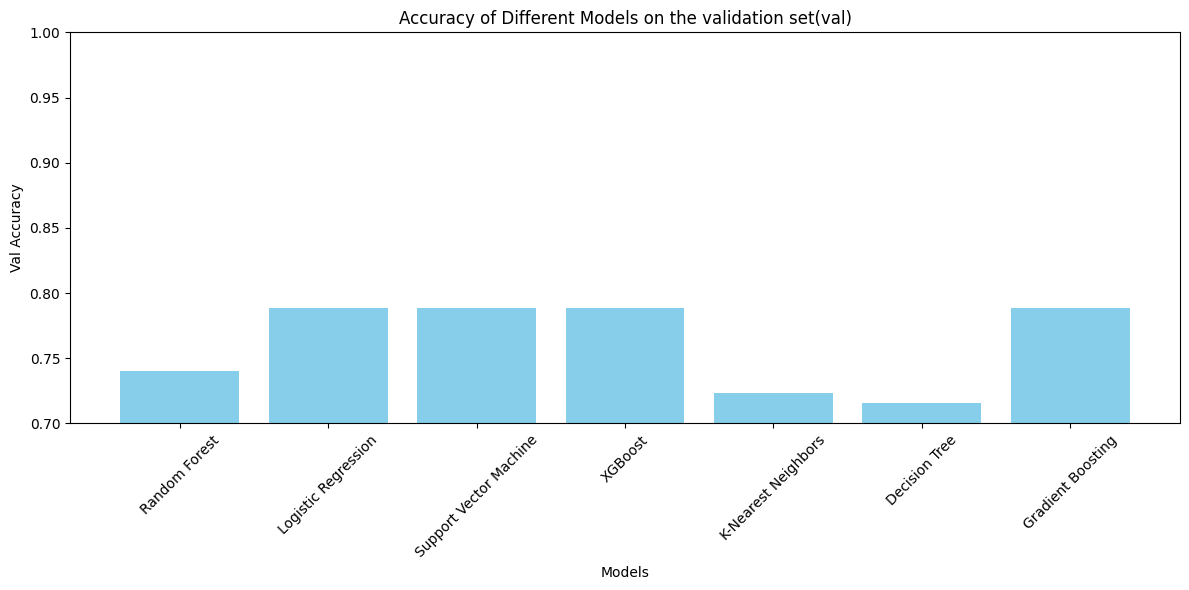

In [ ]:
# Plotting the bar plot
plt.figure(figsize=(12, 6))
plt.bar(Val_accuracies.keys(), Val_accuracies.values(), color='skyblue')
plt.title('Accuracy of Different Models on the validation set(val)')
plt.xlabel('Models')
plt.ylabel('Val Accuracy')
plt.ylim(0.7, 1.0)  # Set y-axis limit for better visualization
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Create a dataframe from the Val_accuracies dictionary
val_df = pd.DataFrame.from_dict(Val_accuracies, orient='index', columns=['Accuracy'])
val_df.sort_values(by='Accuracy', ascending=False, inplace=True)

# Display the dataframe
val_df

,Accuracy
Logistic Regression,0.788618
Support Vector Machine,0.788618
XGBoost,0.788618
Gradient Boosting,0.788618
Random Forest,0.739837
K-Nearest Neighbors,0.723577
Decision Tree,0.715447


#### Precision and Recall

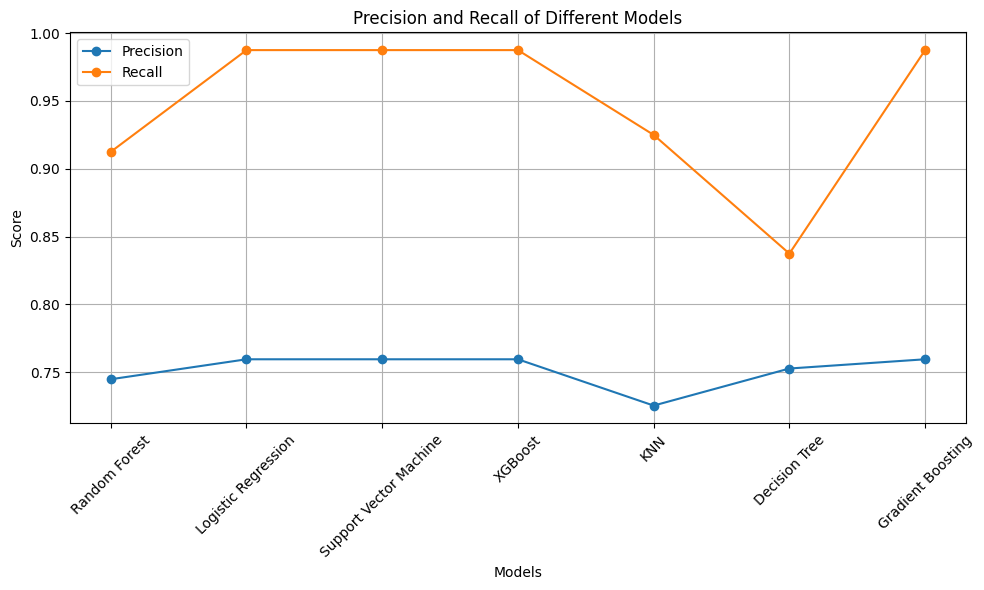

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall for each model
models = ['Random Forest', 'Logistic Regression', 'Support Vector Machine', 'XGBoost', 'KNN', 'Decision Tree', 'Gradient Boosting']
precision_scores = []
recall_scores = []

# Random Forest
precision_scores.append(precision_score(y_val, y_pred_r))
recall_scores.append(recall_score(y_val, y_pred_r))

# Logistic Regression
precision_scores.append(precision_score(y_val, y_pred_lr))
recall_scores.append(recall_score(y_val, y_pred_lr))

# Support Vector Machine
precision_scores.append(precision_score(y_val, y_pred_svm))
recall_scores.append(recall_score(y_val, y_pred_svm))

# XGBoost
precision_scores.append(precision_score(y_val, y_pred_xgb))
recall_scores.append(recall_score(y_val, y_pred_xgb))

# KNN
precision_scores.append(precision_score(y_val, y_pred_knn))
recall_scores.append(recall_score(y_val, y_pred_knn))

# Decision Tree
precision_scores.append(precision_score(y_val, y_pred_dt))
recall_scores.append(recall_score(y_val, y_pred_dt))

# Gradient Boosting
precision_scores.append(precision_score(y_val, y_pred_gb))
recall_scores.append(recall_score(y_val, y_pred_gb))

# Plotting the precision-recall graph
plt.figure(figsize=(10, 6))
plt.plot(models, precision_scores, marker='o', label='Precision')
plt.plot(models, recall_scores, marker='o', label='Recall')
plt.title('Precision and Recall of Different Models')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Create a DataFrame to store precision and recall scores
metrics_df = pd.DataFrame({'Model': Val_accuracies.keys(), 'Precision': precision_scores, 'Recall': recall_scores})
metrics_df.sort_values(by='Recall', ascending=False, inplace=True)
# Print the DataFrame
print(metrics_df)

                    Model  Precision  Recall
1     Logistic Regression   0.759615  0.9875
2  Support Vector Machine   0.759615  0.9875
3                 XGBoost   0.759615  0.9875
6       Gradient Boosting   0.759615  0.9875
4     K-Nearest Neighbors   0.725490  0.9250
0           Random Forest   0.744898  0.9125
5           Decision Tree   0.752809  0.8375


#### Model(s) Evaluation Summary

**Metrics**  
  * ***Precision:*** This metric represents the proportion of predicted positive cases (approved loans) that are actually true positives (loans genuinely approved).
    - High precision means a low number of falsely approved loans (rejected loans predicted as approved).
  * ***Recall:*** This metric represents the proportion of actual positive cases (loans genuinely approved) that are correctly identified by the model (predicted as approved).
    - High recall means the model captures most of the truly approved loans and avoids missing them.

***Interpretation***

Looking at the table and visuals:

All models except K-Nearest Neighbors (KNN) have very high values for both Precision (around 0.76) and Recall (around 0.99). This suggests that these models are good at:
- Identifying truly approved loans (high Recall) - They don't miss many genuinely approved loans.
- Avoiding falsely approving rejected loans (high Precision) - They don't predict too many rejections as approvals.

KNN has a lower Precision and Recall compared to other models. This could be that KNN struggles to differentiate between approved and rejected loans, leading to both false positives (rejected loans predicted as approved) and false negatives (approved loans predicted as rejected).

The table and visuals suggests that the models perform well in predicting loan approval status are; Logistic Regression, Support Vector Machines, XGBoost, and Gradient Boosting achieving similar results with high Precision and Recall.

The final choice of model might depend on factors like interpretability, computational cost, and the specific business priorities regarding false positives and negatives.

### Conclusion

Precision and recall are often in tension with each other. Improving one may come at the expense of the other, therefore the choice of which to choose is largely dependant on the cost of misclassification (that is specific business goals and risks associated with loan approvals).

Consider the business context:

* In loan approval, a false positive (wrongly approving a risky loan) could lead to financial loss for the financial institution. So, high Precision might be desirable to minimize false approvals.
* On the other hand, a false negative (failing to approve a qualified borrower) could lead to lost business for the financial institution. So, prioritize high to capture as many approved loans as possible.

**Summary**
In practical terms, for a financial institution considering loan approval, a high precision score ensures that the institution doesn't wrongly approve risky applicants, minimizing potential financial losses. At the same time, a high recall score ensures that the institution doesn't miss out on approving deserving applicants thereby, maintaining customer satisfaction and business growth. Therefore, a model with both high precision and high recall is desirable for effective loan approval decisions.

Additional Notes:

It's important to consider other evaluation metrics like F1-score or AUC-ROC curve for a more comprehensive picture of model performance.





### Limitations
***Data Bias and Fairness:***
If the training data used to build the model reflects historical biases (e.g., gender, race, socioeconomic status) in loan approvals, the model might perpetuate those biases and unfairly disadvantage certain groups of applicants. Loan officers Should use their judgment to mitigate such biases.

***Ethical Considerations:***
There are ethical concerns surrounding the use of machine learning models in loan approval. For example, if a model consistently disapproves loans for certain demographics, this could raise concerns about fairness and discrimination. Ensure fairness by considering ethical implications and make adjustments as needed.

### Future work
Deployment and monitoring - Integrating the model into a production environment and continuously monitoring its performance to ensure its effectiveness and fairness

# Predicting the test dataset

In [162]:
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Logistic Regression
0,1,1,0,0,0,0.186461,-0.673335,-0.426780,0.266022,1.0,2,1
1,1,1,1,0,0,-0.352692,-0.029848,-0.163953,0.266022,1.0,2,1
2,1,1,2,0,0,0.039641,0.098849,1.183033,0.266022,1.0,2,1
3,1,1,2,0,0,-0.502774,0.418877,-0.591047,0.266022,1.0,2,1
4,1,0,0,1,0,-0.311909,-0.673335,-0.952433,0.266022,1.0,2,1


In [ ]:
models = {'Logistic Regression':lr_grid_search.predict(test_df),
          'Support Vector Machine':svm_grid_search.predict(test_df),
          'XGBoost':xgb_grid_search.predict(test_df),
          'Gradient Boosting':gb_grid_search.predict(test_df)}

In [163]:
features = X_train.columns

In [ ]:
test_df.columns

In [164]:

# Creating a dictionary of the best performing models
models = {
    'Logistic Regression': lr_grid_search.predict,
    'Support Vector Machine': svm_grid_search.predict,
    'XGBoost': xgb_grid_search.predict,
    'Gradient Boosting': gb_grid_search.predict
}

# Create a new DataFrame to store the predictions
predictions_df = pd.DataFrame()

# Apply each model's prediction method to the test_df and store the results in the new DataFrame
for model_name, predict_method in models.items():
    predictions_df[model_name] = predict_method(test_df[features] )

# Now predictions_df contains all the Loan_Status predictions for the test_df
print(predictions_df)

     Logistic Regression  Support Vector Machine  XGBoost  Gradient Boosting
0                      1                       1        1                  1
1                      1                       1        1                  1
2                      1                       1        1                  1
3                      1                       1        1                  1
4                      1                       1        1                  1
..                   ...                     ...      ...                ...
362                    1                       1        1                  1
363                    1                       1        1                  1
364                    1                       1        1                  1
365                    1                       1        1                  1
366                    1                       1        1                  1

[367 rows x 4 columns]


In [165]:
# Concatenate the test_df and predictions_df along the columns
result_df = pd.concat([test_df, predictions_df], axis=1)

In [166]:
result_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Logistic Regression,Logistic Regression,Support Vector Machine,XGBoost,Gradient Boosting
0,1,1,0,0,0,0.186461,-0.673335,-0.426780,0.266022,1.0,2,1,1,1,1,1
1,1,1,1,0,0,-0.352692,-0.029848,-0.163953,0.266022,1.0,2,1,1,1,1,1
2,1,1,2,0,0,0.039641,0.098849,1.183033,0.266022,1.0,2,1,1,1,1,1
3,1,1,2,0,0,-0.502774,0.418877,-0.591047,0.266022,1.0,2,1,1,1,1,1
4,1,0,0,1,0,-0.311909,-0.673335,-0.952433,0.266022,1.0,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,-0.162439,0.088982,-0.377500,0.266022,1.0,2,1,1,1,1,1
363,1,1,0,0,0,-0.132056,-0.369180,-0.344647,0.266022,1.0,2,1,1,1,1,1
364,1,0,0,0,0,-0.317211,0.181644,-0.163953,0.266022,1.0,1,1,1,1,1,1
365,1,1,0,0,0,0.039641,0.353241,0.361700,0.266022,1.0,0,1,1,1,1,1
